In [13]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [14]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [15]:
from zipfile import ZipFile
dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [16]:
from zipfile import ZipFile
dataset = '/content/train.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [17]:
import os
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images',file_count)

Number of images 25000


In [18]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.5301.jpg', 'cat.4681.jpg', 'cat.7680.jpg', 'cat.10100.jpg', 'cat.3481.jpg', 'dog.3223.jpg', 'dog.7130.jpg', 'cat.2590.jpg', 'cat.7382.jpg', 'cat.9454.jpg', 'cat.454.jpg', 'cat.2499.jpg', 'dog.1989.jpg', 'cat.2762.jpg', 'cat.7215.jpg', 'dog.4653.jpg', 'dog.1136.jpg', 'cat.2108.jpg', 'cat.2634.jpg', 'dog.4909.jpg', 'dog.8587.jpg', 'dog.3539.jpg', 'dog.3058.jpg', 'cat.9112.jpg', 'dog.6454.jpg', 'cat.12178.jpg', 'dog.5689.jpg', 'cat.10631.jpg', 'dog.1445.jpg', 'dog.7008.jpg', 'dog.822.jpg', 'cat.4411.jpg', 'cat.624.jpg', 'cat.5386.jpg', 'cat.4929.jpg', 'dog.478.jpg', 'dog.9240.jpg', 'dog.6236.jpg', 'cat.4666.jpg', 'dog.3921.jpg', 'cat.11914.jpg', 'dog.4242.jpg', 'cat.2616.jpg', 'cat.263.jpg', 'cat.8215.jpg', 'dog.12425.jpg', 'cat.125.jpg', 'cat.2934.jpg', 'cat.8717.jpg', 'dog.2497.jpg', 'cat.3245.jpg', 'cat.9693.jpg', 'cat.11160.jpg', 'dog.7567.jpg', 'cat.4941.jpg', 'cat.1793.jpg', 'cat.6711.jpg', 'cat.11550.jpg', 'cat.4485.jpg', 'cat.6658.jpg', 'dog.12070.jpg', 'dog.2692.jpg', 'dog.

In [19]:
len(file_names)

25000

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

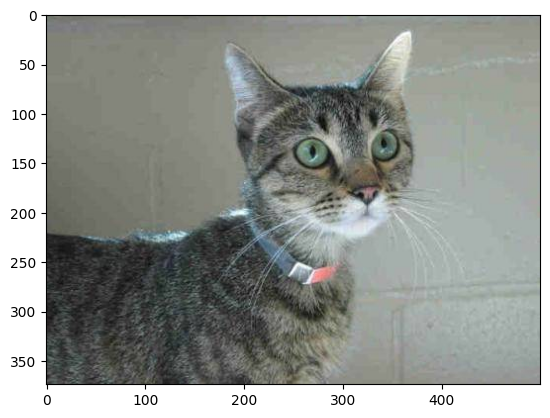

In [21]:
img = mpimg.imread('/content/train/cat.2590.jpg')
img_plt =  plt.imshow(img)
plt.show()

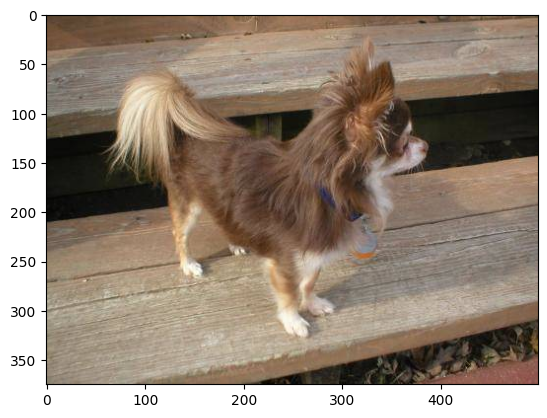

In [22]:
img = mpimg.imread('/content/train/dog.8593.jpg')
img_plt = plt.imshow(img)
plt.show()

**Counting no of dogs and cats**

In [23]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for file in (file_names):
    name = file[0:3]

    if name == 'dog':
        dog_count +=1
    else:
        cat_count +=1

print('Number of dogs',dog_count)
print('Number of cats',cat_count)

Number of dogs 12500
Number of cats 12500


In [ ]:
os.mkdir('/content/image resized/')

**Resizing Images**

In [26]:
original_folder = '/content/train/'
resized_folder  = '/content/image resized/'


for i in range(2000):
     filename = os.listdir(original_folder)[i]
     img_path = original_folder + filename

     img = Image.open(img_path)
     img = img.resize((224,224))
     img = img.convert('RGB')


     newImgPath = resized_folder + filename
     img.save(newImgPath)





**Creating labels for cats(0) and dogs(1)**

In [27]:
filenames = os.listdir('/content/image resized/')

labels = []

for i in range(2000):
    filename = filenames[i]

    if filename[0:3] == 'dog':
       labels.append(1)
    else:
       labels.append(0)


In [28]:
print(labels[0:10])
print(len(filenames))

[0, 0, 0, 0, 0, 1, 1, 0, 0, 0]
2000


In [29]:
print(filenames[0:10])

['cat.5301.jpg', 'cat.4681.jpg', 'cat.7680.jpg', 'cat.10100.jpg', 'cat.3481.jpg', 'dog.3223.jpg', 'dog.7130.jpg', 'cat.2590.jpg', 'cat.7382.jpg', 'cat.9454.jpg']


In [30]:
values,counts = np.unique(labels,return_counts = True)
print(values)
print(counts)

[0 1]
[1018  982]


**Coverting all resized images to numpy array**

In [31]:
import cv2
import glob

In [32]:
image_directory = '/content/image resized/'
image_extensions = ['png','jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e )) for e in image_extensions]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [33]:
for i in range(5):
  print(files[i])
type(files)

/content/image resized/cat.5301.jpg
/content/image resized/cat.4681.jpg
/content/image resized/cat.7680.jpg
/content/image resized/cat.10100.jpg
/content/image resized/cat.3481.jpg


list

In [34]:
print(dog_cat_images)

[[[[177 112 114]
   [222 157 159]
   [220 157 159]
   ...
   [167  96 106]
   [134  52  64]
   [130  44  56]]

  [[236 183 186]
   [255 230 230]
   [255 231 233]
   ...
   [186 127 135]
   [150  83  92]
   [144  73  83]]

  [[231 205 205]
   [255 252 250]
   [255 252 252]
   ...
   [179 147 152]
   [151 110 117]
   [152 108 115]]

  ...

  [[218 180 162]
   [255 227 208]
   [255 226 207]
   ...
   [229 171 172]
   [248 182 187]
   [252 182 188]]

  [[213 176 156]
   [255 222 202]
   [244 215 194]
   ...
   [204 139 141]
   [225 151 157]
   [237 160 168]]

  [[176 139 119]
   [215 182 162]
   [195 166 145]
   ...
   [166  97 100]
   [171  94 102]
   [179  98 107]]]


 [[[176 167 163]
   [163 156 153]
   [132 130 129]
   ...
   [ 61  90 105]
   [ 61  90 105]
   [ 61  90 105]]

  [[186 177 173]
   [176 169 166]
   [150 148 147]
   ...
   [ 61  90 105]
   [ 61  90 105]
   [ 61  90 105]]

  [[194 185 181]
   [187 180 177]
   [172 168 167]
   ...
   [ 61  90 105]
   [ 61  90 105]
   [ 61  90

In [35]:
type(dog_cat_images)
print(dog_cat_images.shape)

(2000, 224, 224, 3)


**Train Test Split**

In [36]:
X = dog_cat_images

Y = np.asarray(labels)

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state = 3)

In [38]:
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


**Scaling the dataset**

In [39]:
X_train_scaled = X_train/255
X_test_scaled  = X_test/255

In [40]:
print(X_train_scaled)

[[[[0.04705882 0.04705882 0.04705882]
   [0.05882353 0.05882353 0.05882353]
   [0.05490196 0.05490196 0.05490196]
   ...
   [0.0627451  0.04313725 0.00784314]
   [0.05490196 0.03529412 0.        ]
   [0.06666667 0.04705882 0.01176471]]

  [[0.05098039 0.05098039 0.05098039]
   [0.05882353 0.05882353 0.05882353]
   [0.05490196 0.05490196 0.05490196]
   ...
   [0.0627451  0.04313725 0.00784314]
   [0.05882353 0.03921569 0.00392157]
   [0.06666667 0.04705882 0.01176471]]

  [[0.05098039 0.05098039 0.05098039]
   [0.0627451  0.0627451  0.0627451 ]
   [0.05882353 0.05882353 0.05882353]
   ...
   [0.0627451  0.04313725 0.00784314]
   [0.05882353 0.03921569 0.00392157]
   [0.07058824 0.05098039 0.01568627]]

  ...

  [[0.5254902  0.58039216 0.56470588]
   [0.52156863 0.57647059 0.56078431]
   [0.52156863 0.57647059 0.56078431]
   ...
   [0.05098039 0.01568627 0.00392157]
   [0.05098039 0.01568627 0.00392157]
   [0.05098039 0.01568627 0.00392157]]

  [[0.50588235 0.54901961 0.5372549 ]
   [0.4

**Building Neural Network**

In [41]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

In [42]:
#!pip install --upgrade tensorflow==2.11.0 tensorflow-hub keras==2.11.0

In [43]:
print(tf.__version__)
print(hub.__version__)

2.11.0
0.16.1


In [44]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

# Load the pre-trained model from TensorFlow Hub
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3), trainable=False)

num_of_classes = 2

# Build the model using Sequential API
model = keras.Sequential([
                           pretrained_model,
                           keras.layers.Dense(num_of_classes, activation='softmax') ])


model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_3 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [45]:
model.compile(
              optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['acc']
)

In [46]:
model.fit( X_train_scaled, Y_train, epochs = 5 )

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 [==============================] - 83s 2s/step - loss: 0.2287 - acc: 0.9087
Epoch 2/5
50/50 [==============================] - 109s 2s/step - loss: 0.0714 - acc: 0.9794
Epoch 3/5
50/50 [==============================] - 117s 2s/step - loss: 0.0504 - acc: 0.9869
Epoch 4/5
50/50 [==============================] - 116s 2s/step - loss: 0.0403 - acc: 0.9912
Epoch 5/5
50/50 [==============================] - 111s 2s/step - loss: 0.0334 - acc: 0.9937


In [47]:
score, accuracy = model.evaluate(X_test_scaled,Y_test)
print('Test Loss',score)
print('Test Accuracy',accuracy)

/usr/local/lib/python3.10/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


13/13 [==============================] - 20s 1s/step - loss: 0.0425 - acc: 0.9850
Test Loss 0.04254794120788574
Test Accuracy 0.9850000143051147


/content/dog1.jpeg


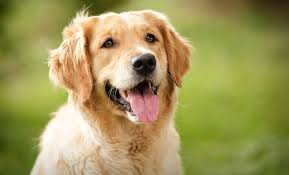

1/1 [==============================] - 0s 68ms/step
The image is a dog


In [52]:
input_image_path = input()
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image,(224,224))

input_image_scaled = input_image_resize/255

input_image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(input_image_reshaped)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print('The image is a cat')
else:
  print('The image is a dog')
